In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# ---
# 1. Load Dataset
# ---
df = pd.read_csv("knn_telecom.csv")

# Remove ID columns if present
df = df.loc[:, ~df.columns.str.lower().str.contains("id")]

In [3]:
# ---
# 2. Handle Missing Values Properly
# ---
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [4]:
# ---------------------------------------------------------
# # 3. Separate Features and Target
# ---------------------------------------------------------
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Identify feature types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [5]:
# ---------------------------------------------------------
# # 4. Preprocessing Pipeline
# ---------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

In [6]:
# ---------------------------------------------------------
# # 5. Cross-Validation to Select Best K
# ---------------------------------------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

k_values = range(1, 16)
cv_scores = []

for k in k_values:
    model = Pipeline([
        ("preprocessing", preprocessor),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")
    cv_scores.append(scores.mean())

# Display results
for k, score in zip(k_values, cv_scores):
    print(f"K = {k} | CV Accuracy = {round(score, 4)}")

best_k = k_values[np.argmax(cv_scores)]
print("\nBest K Selected:", best_k)

K = 1 | CV Accuracy = 0.9533
K = 2 | CV Accuracy = 0.94
K = 3 | CV Accuracy = 0.9667
K = 4 | CV Accuracy = 0.96
K = 5 | CV Accuracy = 0.96
K = 6 | CV Accuracy = 0.96
K = 7 | CV Accuracy = 0.96
K = 8 | CV Accuracy = 0.9667
K = 9 | CV Accuracy = 0.96
K = 10 | CV Accuracy = 0.96
K = 11 | CV Accuracy = 0.96
K = 12 | CV Accuracy = 0.96
K = 13 | CV Accuracy = 0.9667
K = 14 | CV Accuracy = 0.9667
K = 15 | CV Accuracy = 0.96

Best K Selected: 3


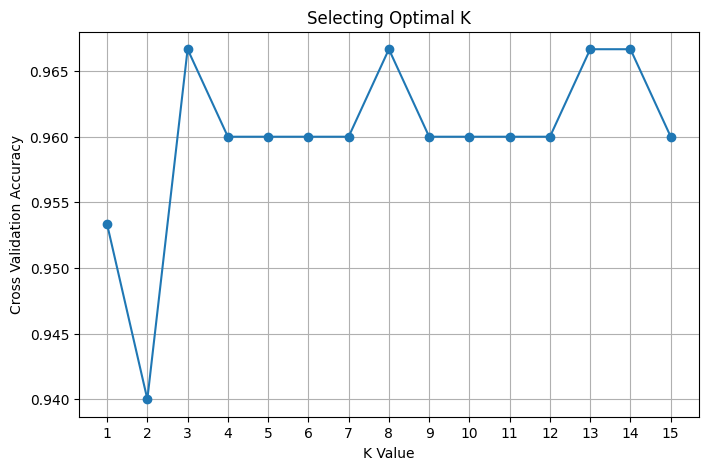

In [7]:
# ---------------------------------------------------------
# # 6. Plot Accuracy vs K
# ---------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("Cross Validation Accuracy")
plt.title("Selecting Optimal K")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [8]:
# ---------------------------------------------------------
# # 7. Train Final Model with Best K
# ---------------------------------------------------------
final_model = Pipeline([
    ("preprocessing", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])

final_model.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('knn', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers con

In [10]:
# ---------------------------------------------------------
# # 8. User Input Prediction
# ---------------------------------------------------------

# Modify values as required
user_data = {
    "Age": 40,
    "Gender": "Male",
    "PlanType": "Premium",
    "Tenure": 12,
    "MonthlyUsage": 350
}

user_df = pd.DataFrame([user_data])

prediction = final_model.predict(user_df)[0]
probability = final_model.predict_proba(user_df)[0]

print("\nUser Input:")
print(user_df)

print("\nPredicted Churn:", prediction)
print("Prediction Probability:", probability)


User Input:
   Age Gender PlanType  Tenure  MonthlyUsage
0   40   Male  Premium      12           350

Predicted Churn: 1
Prediction Probability: [0. 1.]
